> Anaísa Forti da Fonseca  |  11811ECP012

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

# Quadratura de Gauss

A quadratura de Gauss generalizada é definida como:

> $\displaystyle\int_a^b\ f(x)\,dx = \sum_{k=0}^{m-1}\ w(x_k)\,f(x_k)\quad+\ R_m(x)$,

> onde $x_k$ são os pontos de integração; $m$ é a quantidade de pontos escolhidos para a quadratura; $w(\cdot)$ são as funções ponderadoras relacionadas com polinômios ortogonais; e $R_m(\cdot)$ é o resíduo (relacionado ao erro) da aproximação quando ao número de pontos escolhido.

## Gauss-Legendre

Adotando os polinômios de Legendre, ortogonais no intervalo $[\,-1,\,1\,]$, temos a seguinte relação:

> $\displaystyle\int_a^b\ f(x)\,dx \approx \frac{b-a}{2}\,\sum_{k=0}^{m-1}\ w(\xi_k)\,f\left(\frac{b-a}{2}\,\xi_k + \frac{b+a}{2}\right)$,

> onde $w(\xi) = \dfrac{2}{(1-\xi^2)\,[P_n'(\xi)]^2}$ e as relações com $a$ e $b$ do lado direito da expressão referentes à mudança de variáveis $[\,a,\,b\,] \rightarrow [\,-1,\,1\,]$ (intervalo de integração); $P_n'(\xi)$ é a derivada dos polinômios de Legendre tipo-1 de grau $d$.

---
### Curiosidade

$P_n(\xi)$, polinômios de Legendre tipo-1 com grau $n$, podem ser definidos pela fórmula recursiva de Bonnet:

> $\displaystyle P_{n+1}(\xi) = \frac{1}{n + 1}\,(2n + 1)\,\xi\,P_n(\xi) - n\,P_{n-1}(\xi)$, com $\xi \in [\,-1,\,1\,]$

Os primeiros polinômios de Legendre tipo-1:

- $P_0(\xi) = 1$
- $P_1(\xi) = x$
- $P_2(\xi) = \frac{1}{2}(3x^2 - 1)$
- $P_3(\xi) = \frac{1}{2}(5x^3 - 3x) \ldots$

In [ ]:
def legendre_poly(n, xi):
    """Polinômio descrito no intervalo [-1, 1]"""
    N = np.max(xi.shape)
    xi = np.reshape(xi, (N, 1))
    if n == 0:
        aux = np.ones((N, 1))
        return aux @ np.array([[1]])
    elif n == 1:
        aux = np.c_[np.ones((N, 1)), xi] # matriz [1 x_n]
        return aux @ np.array([[0], [1]])
    elif n == 2:
        aux = np.c_[np.ones((N, 1)), xi, xi**2] # matriz [1 x_n x_n^2]
        return aux @ np.array([[-0.5], [0], [1.5]])
    else: # adaptado da fórmula recursiva de Bonnet
        m = n - 1
        return ((2*m + 1)*xi*legendre_poly(m, xi) - m*legendre_poly(m - 1, xi))/n

Visualizando polinômios até grau 5 no intervalo $[\,-1,\,1\,]$:

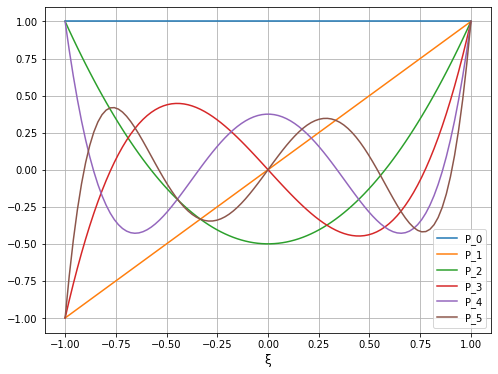

In [ ]:
N = 100
xi = np.reshape(np.linspace(-1, 1, N), (N, 1))

plt.figure(figsize=plt.figaspect(0.75)*1.5)
for n in range(6): # grau 0 a 5
    plt.plot(xi, legendre_poly(n, xi), label=f"P_{n}")
plt.legend()
plt.xlabel("ξ", fontsize=12)
plt.grid('on')
plt.show()

---
# Quadratura de Gauss-Legendre

Cálculo dos coeficientes dos polinôminos de Legendre tipo-1:

In [ ]:
def legendre_coefficients(n):
    aux = np.polynomial.legendre.leg2poly([0]*(n-1) + [1])
    return np.reshape(aux, (aux.shape[0], 1))

Para o cálculo dos pontos e pesos necessários para a quadratura:

In [ ]:
def quadrature_nodes(n_points):
    coeffs = list(reversed(legendre_coefficients(n_points+1).flatten().tolist()))
    roots = np.roots(coeffs).tolist()
    return np.array(sorted(roots))

def quadrature_weights(n_points):
    if n_points == 1:
        return np.array([2])
    nodes = quadrature_nodes(n_points)
    nodes = np.reshape(nodes, (nodes.shape[0], 1))
    coeffs = list(reversed(legendre_coefficients(n_points+1).flatten().tolist()))
    d_coeffs = np.polyder(coeffs)
    dN = d_coeffs.shape[0]
    d_coeffs = np.reshape(d_coeffs, (dN, 1))
    aux = np.ones((nodes.shape[0], 1))
    for n in range(1, dN):
        aux = np.c_[nodes**n, aux]
    dPn = (aux @ d_coeffs).flatten()
    return 2/((1 - nodes.flatten()**2)*dPn**2)

Para conferir, compare a tabela em [Wikipedia: Gauss–Legendre quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss–Legendre_quadrature):

In [ ]:
for i in range(1, 6):
    print(f"n: {i}\npontos: {quadrature_nodes(i)}\n"
        f"pesos:{quadrature_weights(i)}\n")

n: 1
pontos: [0.]
pesos:[2]

n: 2
pontos: [-0.57735027  0.57735027]
pesos:[1. 1.]

n: 3
pontos: [-0.77459667  0.          0.77459667]
pesos:[0.55555556 0.88888889 0.55555556]

n: 4
pontos: [-0.86113631 -0.33998104  0.33998104  0.86113631]
pesos:[0.34785485 0.65214515 0.65214515 0.34785485]

n: 5
pontos: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
pesos:[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]



---
# **TAREFA**

1. Considerando as funções definidas anteriormente, implemente a função para o cálculo da quadratura de Gauss-Legendre (`qgl`)com os seguintes argumentos:
- `f` : função conhecida
- `a`, `b`: limites de integração
- `N`: número de pontos

> $\displaystyle\int_a^b\ f(x)\,dx \approx \frac{b-a}{2}\,\sum_{k=0}^{m-1}\ w(\xi_k)\,f\left(\frac{b-a}{2}\,\xi_k + \frac{b+a}{2}\right)$,

In [ ]:
def qgl(f, a, b, N):
    nodes = quadrature_nodes(N)
    weights = quadrature_weights(N)
    result = ( (b-a)/2 ) * sum( weights * f(((b-a)/2) * nodes + ((b+a)/2)) )
    return result

2. Teste sua função com esse benchmark:

In [ ]:
benchmark = {
    0: {
        'f': lambda x: 2*x**2 + 5*x + 12,
        'a': -1, 'b': 5,
        'integral': 216,
    },
    1: {
        'f': lambda x: x + x**2,
        'a': 0, 'b': 0.5,
        'integral': 1/6,
    },
    2: {
        'f': lambda x: np.sin(2*np.pi*x) + 0.5*np.cos(2*np.pi*3*x) + 1.5,
        'a': 0, 'b': 1,
        'integral': 1.5,
    },
    3: {
        'f': lambda x: np.sin(2*np.pi*x),
        'a': 0, 'b': 0.5,
        'integral': -np.cos(2*np.pi*0.5)/(2*np.pi) -(-np.cos(2*np.pi*0)/(2*np.pi)),
    },
    4: {
        'f': lambda x: 2*np.exp(-x)*np.sin(2*np.pi*x) + 2,
        'a': 0, 'b': 2,
        'integral': 4 + (4*(np.exp(1)**2 - 1)*np.pi)/(np.exp(1)**2*(1 + 4*np.pi**2))
    },
}

@interact(N=(1, 20, 1))
def test(N = 1):
    for k, v in benchmark.items():
        q = qgl(v['f'], v['a'], v['b'], N)
        print(f"ID da função: {k}\nValor da quadratura: {q}\n"
            f"Erro: {100*abs(q - v['integral'])/v['integral']:.50f}%\n")

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), Output()), _dom_classes=('widget-int…

3. Relate suas impressões e conclusões sobre o resultado de seus testes.

## Conclusões

Para as funções dadas no benchmark, nem o valor da quadratura nem o erro seguem um padrão fixo de sempre aumentar ou sempre diminuir conforme aumentamos o número de pontos ($N$). 
  
Entretanto, podemos observar que, a partir de $N=2$, estes valores tendem a se "normalizar". O valor da quadratura tende a um valor específico e, quanto mais perto o valor da quadratura chega desse número específico, menor será o erro (ele tende a 0). 

Podemos citar como exemplo a função de ID 0: para $N \geq 2$, o valor da quadratura mantém-se muito próximo de 216. Nesta função, o menor erro ocorre quando o valor da quadratura é igual à 216,0 ($N=3$), dando a entender que, no intervalo de $1\leq N \leq 20$, o valor da quadratura mais "correto" para a função de ID 0 é o de 216,0.